# Simple Animation Demo

In [28]:
!git clone https://github.com/hagrid67/flatland-rl.git
%cd flatland-rl
!git pull
%cd ..
!pip install -r /content/flatland-rl/requirements_dev.txt &> /dev/null

fatal: destination path 'flatland-rl' already exists and is not an empty directory.
/content/flatland-rl
Already up to date.
/content


In [29]:
import os
import sys
os.environ['PYTHONPATH'] = "/env/python:/content/flatland-rl"
if "/content/flatland-rl" not in sys.path:
  sys.path.insert(1, "/content/flatland-rl")

In [30]:
# import all flatland dependance
import time
from flatland.core.env_observation_builder import ObservationBuilder
from flatland.core.env_observation_builder import DummyObservationBuilder
from flatland.envs.malfunction_generators import ParamMalfunctionGen, MalfunctionParameters
from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import sparse_rail_generator
from flatland.utils.rendertools import RenderTool, AgentRenderVariant
from flatland.envs.rail_env_action import RailEnvActions

In [31]:
from IPython.display import display, clear_output
import ipywidgets as ipw
from io import BytesIO
import PIL
      
def create_rendering_area():
  rendering_area = ipw.Image()
  display(rendering_area)
  return rendering_area

def render_env(flatland_renderer, rendering_area : ipw.Image):
    flatland_renderer.render_env(show=False, show_observations=False)
    image = flatland_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    if rendering_area is None:
      clear_output(wait=False)
      display(pil_image)
      return

    # convert numpy to PIL to png-format bytes  
    with BytesIO() as fOut:
      pil_image.save(fOut, format="png")
      byPng = fOut.getvalue()
        
    # set the png bytes as the image value; 
    # this updates the image in the browser.
    rendering_area.value=byPng
    time.sleep(1.0)


In [32]:
def _create_flatland_env(
        obs_builder_object: ObservationBuilder,
        max_rails_between_cities=2,
        max_rails_in_city=4,
        malfunction_rate=1 / 1000,
        n_cities=5,
        number_of_agents=10,
        grid_width=30,
        grid_height=40,
        random_seed=0) -> RailEnv:
    return RailEnv(
        width=grid_width,
        height=grid_height,
        rail_generator=sparse_rail_generator(
            max_num_cities=n_cities,
            seed=random_seed,
            grid_mode=True,
            max_rails_between_cities=max_rails_between_cities,
            max_rail_pairs_in_city=max_rails_in_city
        ),
        malfunction_generator=ParamMalfunctionGen(
            MalfunctionParameters(
                malfunction_rate=malfunction_rate, min_duration=10, max_duration=50
            )
        ),
        random_seed=random_seed,
        number_of_agents=number_of_agents,
        obs_builder_object=obs_builder_object
    )

In [33]:
env = _create_flatland_env(DummyObservationBuilder())

In [34]:
env_renderer = RenderTool(env, gl="PILSVG",
                                  agent_render_variant=AgentRenderVariant.AGENT_SHOWS_OPTIONS_AND_BOX,
                                  show_debug=True,
                                  screen_height=750,
                                  screen_width=750)

In [35]:
obs, info = env.reset()

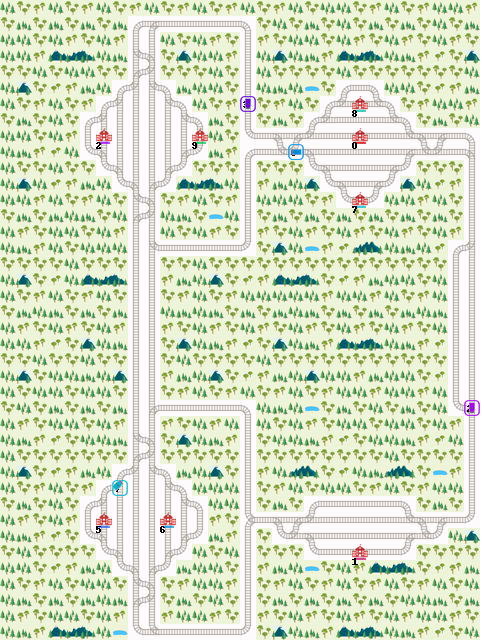

In [36]:
rendering_area = create_rendering_area()
for step in range(25):
  action_dict = dict()
  for a in range(env.get_num_agents()):
    action_dict.update({a: RailEnvActions.MOVE_FORWARD})
  
  env.step(action_dict)

  render_env(env_renderer, rendering_area)

render_env(env_renderer, None)